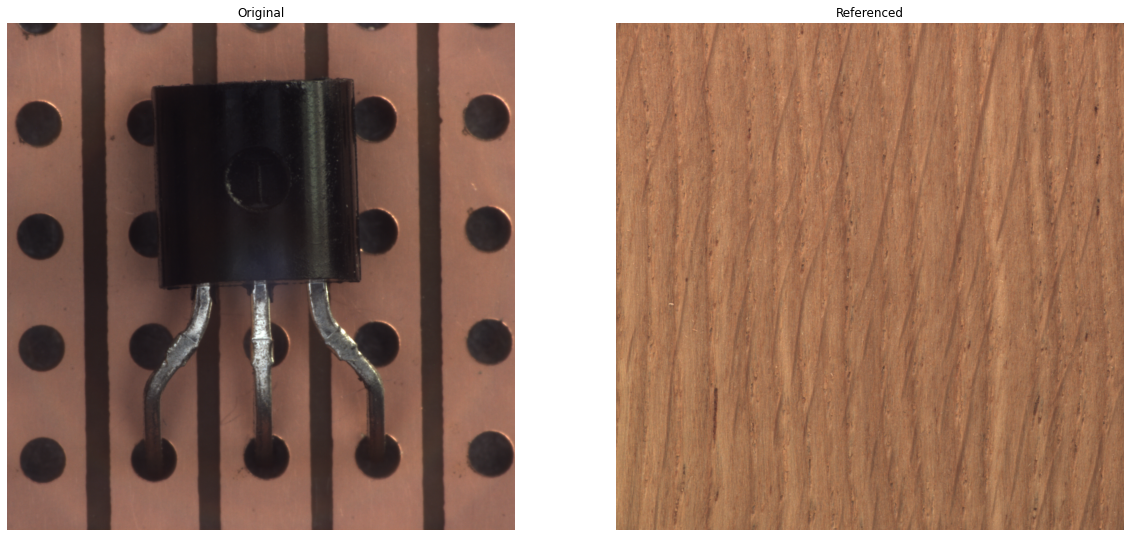

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
c:\ProgramData\Anaconda3\lib\site-packages\albumentations\augmentations\functional.py:1753: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = skimage.segmentation.slic(image, n_segments=n_segments, compactness=10)


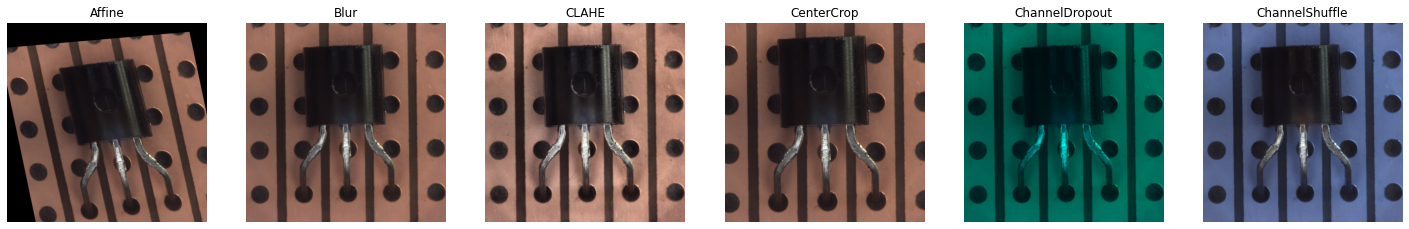

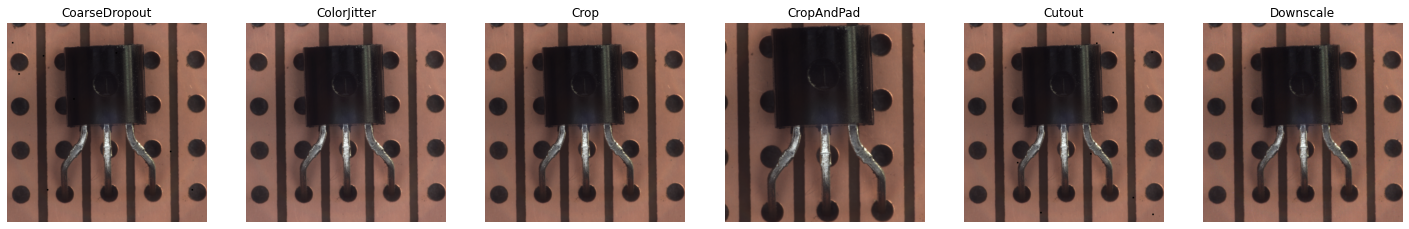

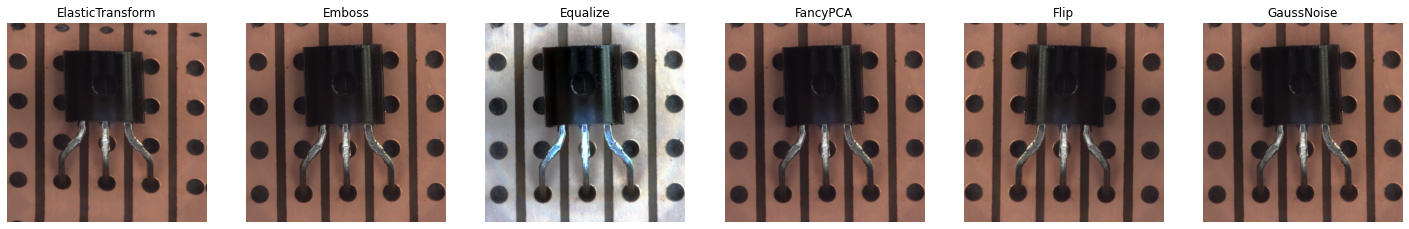

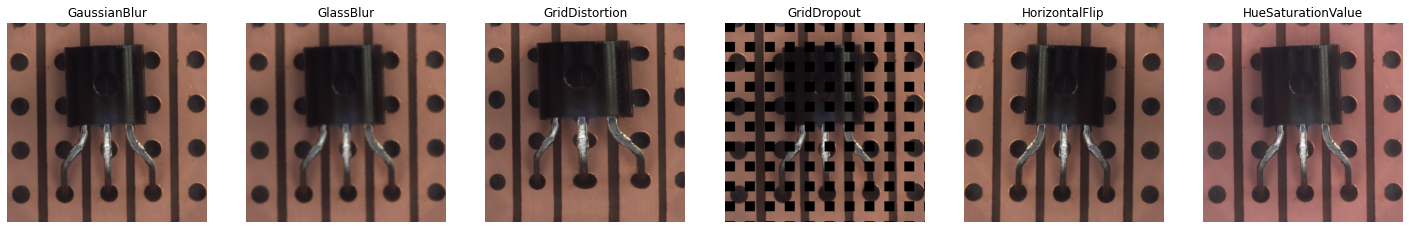

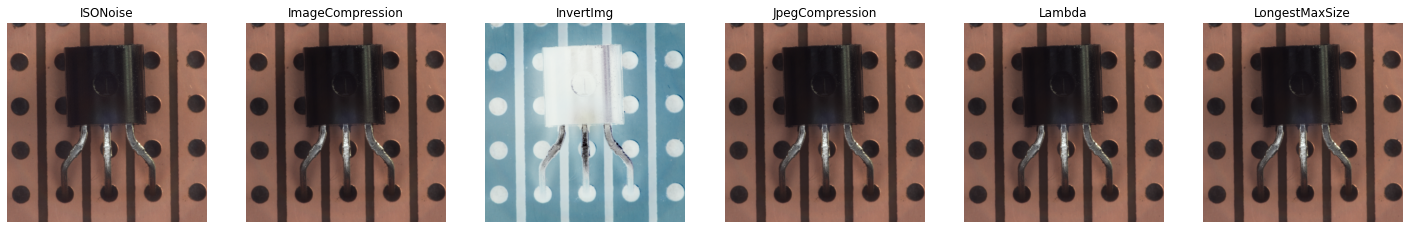

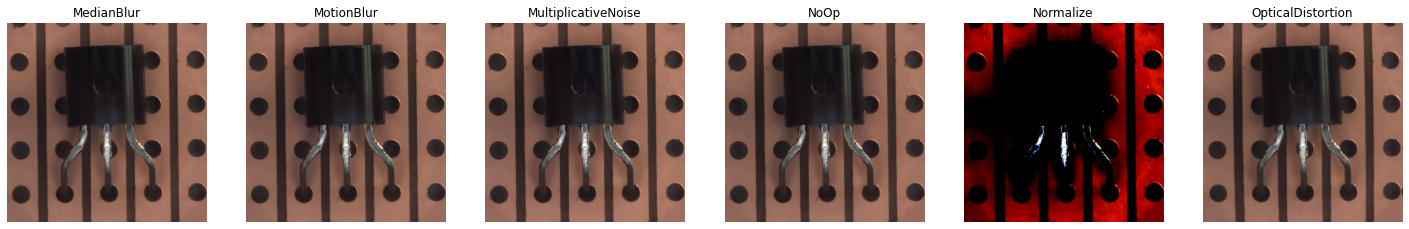

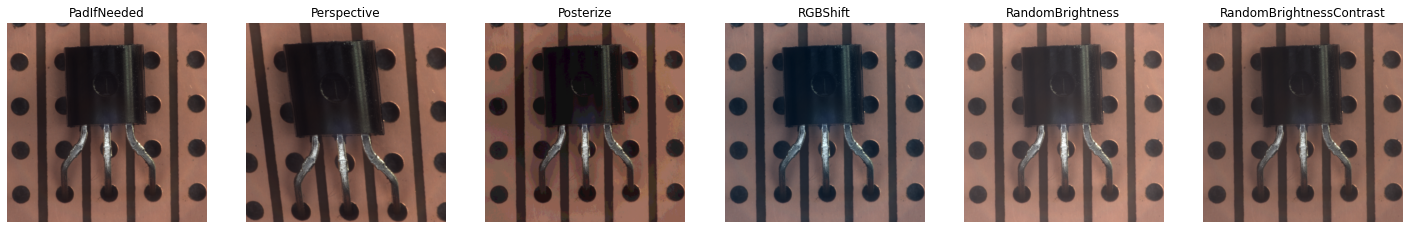

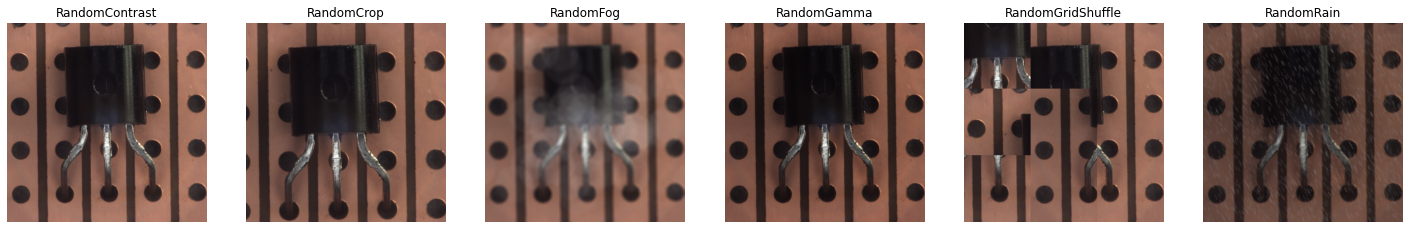

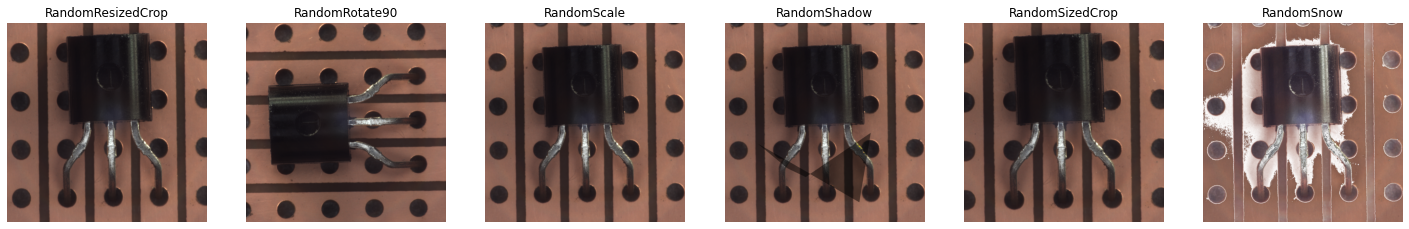

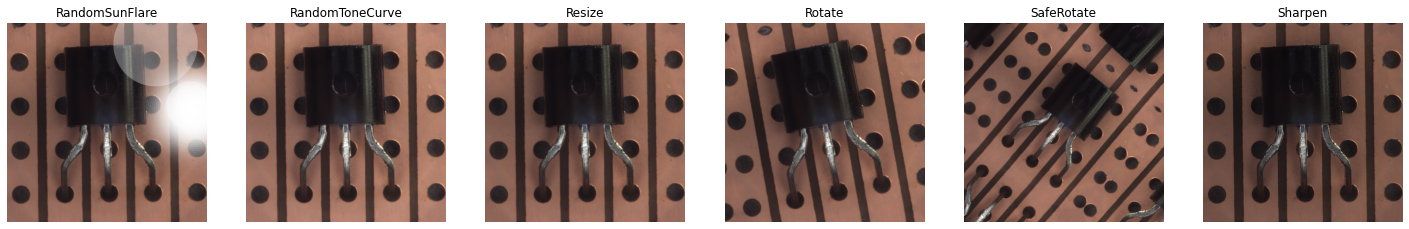

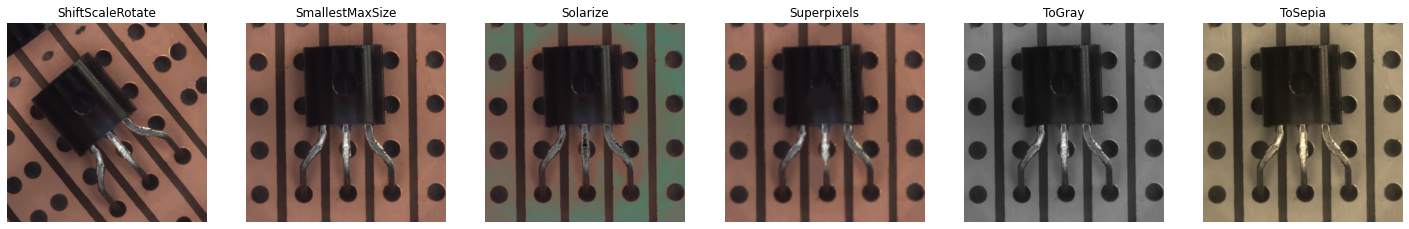

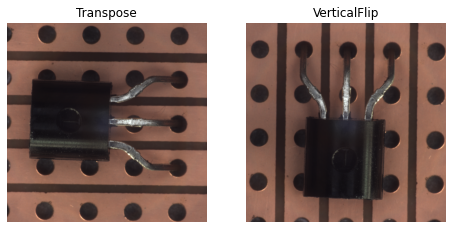

In [62]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

reference_img = cv2.imread('./open/train/10003.png')
reference_img = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)

size = 1024

A_list = {
    'Affine': A.Affine(p=1),
    'Blur': A.Blur(p=1),
    'CLAHE': A.CLAHE(p=1),
    'CenterCrop': A.CenterCrop(int(size*0.9), int(size*0.9), p=1),
    'ChannelDropout': A.ChannelDropout(p=1),
    'ChannelShuffle': A.ChannelShuffle(p=1),
    'CoarseDropout': A.CoarseDropout(p=1),
    'ColorJitter': A.ColorJitter(p=1),
    'Crop': A.Crop(p=1),
    'CropAndPad': A.CropAndPad(int(-0.1*size), p=1),
    'Cutout': A.Cutout(p=1),
    'Downscale': A.Downscale(p=1),
    'ElasticTransform': A.ElasticTransform(p=1),
    'Emboss': A.Emboss(p=1),
    'Equalize': A.Equalize(p=1),
    'FancyPCA': A.FancyPCA(p=1),
    'Flip': A.Flip(p=1),
    'GaussNoise': A.GaussNoise(p=1),
    'GaussianBlur': A.GaussianBlur(p=1),
    'GlassBlur': A.GlassBlur(p=1),
    'GridDistortion': A.GridDistortion(p=1),
    'GridDropout': A.GridDropout(p=1),
    'HorizontalFlip': A.HorizontalFlip(p=1),
    'HueSaturationValue': A.HueSaturationValue(p=1),
    'ISONoise': A.ISONoise(p=1),
    'ImageCompression': A.ImageCompression(p=1),
    'InvertImg': A.InvertImg(p=1),
    'JpegCompression': A.JpegCompression(p=1),
    'Lambda': A.Lambda(p=1),
    'LongestMaxSize': A.LongestMaxSize(p=1),
    'MedianBlur': A.MedianBlur(p=1),
    'MotionBlur': A.MotionBlur(p=1),
    'MultiplicativeNoise': A.MultiplicativeNoise(p=1),
    'NoOp': A.NoOp(p=1),
    'Normalize': A.Normalize(p=1),
    'OpticalDistortion': A.OpticalDistortion(p=1),
    'PadIfNeeded': A.PadIfNeeded(p=1),
    'Perspective': A.Perspective(p=1),
    'Posterize': A.Posterize(p=1),
    'RGBShift': A.RGBShift(p=1),
    'RandomBrightness': A.RandomBrightness(p=1),
    'RandomBrightnessContrast': A.RandomBrightnessContrast(p=1),
    'RandomContrast': A.RandomContrast(p=1),
    'RandomCrop': A.RandomCrop(int(size*0.9), int(size*0.9), p=1),
    'RandomFog': A.RandomFog(p=1),
    'RandomGamma': A.RandomGamma(p=1),
    'RandomGridShuffle': A.RandomGridShuffle(p=1),
    'RandomRain': A.RandomRain(p=1),
    'RandomResizedCrop': A.RandomResizedCrop(int(size*0.9), int(size*0.9), p=1),
    'RandomRotate90': A.RandomRotate90(p=1),
    'RandomScale': A.RandomScale(p=1),
    'RandomShadow': A.RandomShadow(p=1),
    'RandomSizedCrop': A.RandomSizedCrop((int(size*0.9), int(size*0.9)), size, size, p=1),
    'RandomSnow': A.RandomSnow(p=1),
    'RandomSunFlare': A.RandomSunFlare(p=1),
    'RandomToneCurve': A.RandomToneCurve(p=1),
    'Resize': A.Resize(int(size*0.9), int(size*0.9), p=1),
    'Rotate': A.Rotate(p=1),
    'SafeRotate': A.SafeRotate(p=1),
    'Sharpen': A.Sharpen(p=1),
    'ShiftScaleRotate': A.ShiftScaleRotate(p=1),
    'SmallestMaxSize': A.SmallestMaxSize(p=1),
    'Solarize': A.Solarize(p=1),
    'Superpixels': A.Superpixels(p=1),
    'ToGray': A.ToGray(p=1),
    'ToSepia': A.ToSepia(p=1),
    'Transpose': A.Transpose(p=1),
    'VerticalFlip': A.VerticalFlip(p=1)
}

img = cv2.imread('./open/train/10000.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Referenced')
plt.imshow(reference_img)
plt.show()

for idx, key in enumerate(A_list.keys()):
    if idx%6==0:
        plt.figure(figsize=(25,16))
    aug = A_list[key]
    if type(aug)==list:
        aug = A.Compose(aug)
    tf_img = aug(image=img)['image']
    plt.subplot(1, 6, (idx%6)+1)
    plt.axis('off')
    plt.title(key)
    plt.imshow(tf_img)